In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Load data from text file
data = np.loadtxt('DataNew.txt', skiprows=0)

# Define input (X) and output (y)
X = data[:, :-1]  # All columns except the last two (equivalent to columns 1 to 21)
y = data[:, -1]   # The second last column (equivalent to column 22)

# Split the dataset into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(data.shape)


(1764, 12)
(2520, 13)


In [3]:
print(y[0])
print(X[0])

0.000854
[2.00000e+01 3.00000e+02 1.00000e+01 4.00000e+01 5.50000e+00 1.00000e-01
 2.71104e+00 6.73340e-01 3.07500e-02 4.19732e+01 1.33120e-01 1.17000e+00]


In [4]:
from datetime import datetime
import os
now = datetime.now() 
date_time = now.strftime("%m%d%Y_%H_%M")

#path = ('.\\Final_Total_R2_Drift_'f"{date_time}"'\\')
path = ('.\\Slope_'f"{date_time}"'\\')
os.mkdir(path)

# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
rfr = RandomForestRegressor()
kfold = KFold(n_splits=10, random_state=7)
#scores = cross_val_score(rfr_model, X, y, cv=2, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, X, y, cv=kfold)
#neg_mean_squared_error

from sklearn.metrics import r2_score
plt.scatter(y, y)
plt.scatter(predictions, y)
rmse = np.sqrt(mean_squared_error(y, predictions))
rmse
R2=r2_score(y, predictions)
print(R2,rmse)

In [5]:
def search_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False, search_mode = 'GridSearchCV', n_iterations = 0):
    fitted_model = None
    
    if(search_mode == 'GridSearchCV'):
        gs = GridSearchCV(
            estimator=model,
            param_grid=param_grid, 
            cv=cv, 
            n_jobs=-1, 
            scoring=scoring_fit,
            verbose=2
        )
        fitted_model = gs.fit(X_train_data, y_train_data)

    elif (search_mode == 'RandomizedSearchCV'):
        rs = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid, 
            cv=cv,
            n_iter=n_iterations,
            n_jobs=-1, 
            scoring=scoring_fit,
            verbose=2
        )
        fitted_model = rs.fit(X_train_data, y_train_data)
    
    
    if(fitted_model != None):
        if do_probabilities:
            pred = fitted_model.predict_proba(X_test_data)
        else:
            pred = fitted_model.predict(X_test_data)
            
        return fitted_model, pred

In [6]:
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

# RF

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best RFR Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RFR Mean CV MSE: -0.9515
Grid search results saved to 'RFR_GridSearch_CV_Results.csv'
RFR Cross-validation R² scores: [0.93336077 0.96937994 0.94506819 0.95245989 0.95719162]
RFR Mean R²: 0.9515
RFR Std deviation: 0.0120
Cross-validation scores saved to 'Best_RFR_CV_Scores.csv'


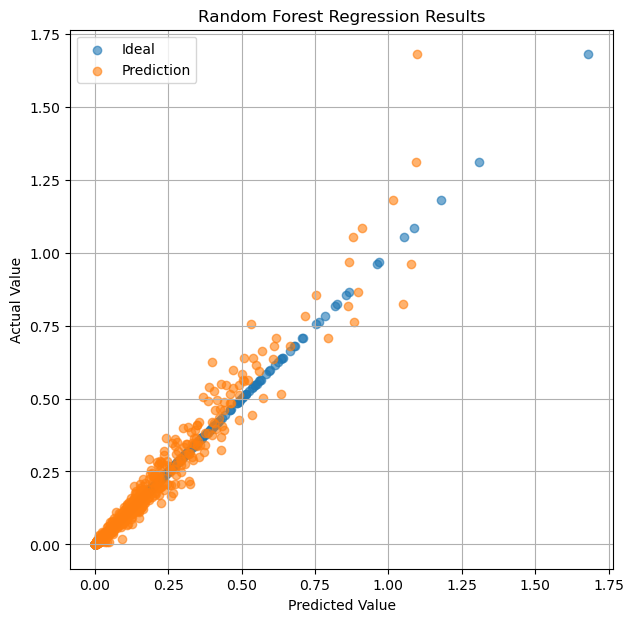

Test R² Score: 0.9514
Test RMSE: 0.0413


In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Step 0: Define K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 1: Define a wider hyperparameter grid for RandomForestRegressor
param_grid_RFR = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Step 2: Set up GridSearchCV
grid_search_RFR = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    #estimator=RandomForestRegressor(),
    param_grid=param_grid_RFR,
    cv=kf,
    #scoring='neg_mean_squared_error',  # You can also use 'r2' for R² score
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit GridSearchCV
grid_search_RFR.fit(x_train, y_train)

# Step 4: Retrieve and print best hyperparameters and score
best_RFR = grid_search_RFR.best_estimator_
print(f'Best RFR Hyperparameters: {grid_search_RFR.best_params_}')
print(f'Best RFR Mean CV MSE: {-grid_search_RFR.best_score_:.4f}')

# Step 5: Save all GridSearch results
df_grid_RFR = pd.DataFrame(grid_search_RFR.cv_results_)
df_grid_RFR.to_csv(f"{path}RFR_GridSearch_CV_Results.csv", index=False)
print("Grid search results saved to 'RFR_GridSearch_CV_Results.csv'")

# Step 6: Evaluate best model with 5-fold CV
cv_scores_RFR = cross_val_score(best_RFR, x_train, y_train, cv=kf, scoring='r2')

# Step 7: Print and save R² scores
print(f'RFR Cross-validation R² scores: {cv_scores_RFR}')
print(f'RFR Mean R²: {np.mean(cv_scores_RFR):.4f}')
print(f'RFR Std deviation: {np.std(cv_scores_RFR):.4f}')

df_cv_RFR = pd.DataFrame({'Fold': range(1, len(cv_scores_RFR)+1), 'R² Score': cv_scores_RFR})
df_cv_RFR.to_csv(f"{path}Best_RFR_CV_Scores.csv", index=False)
print("Cross-validation scores saved to 'Best_RFR_CV_Scores.csv'")

# Step 8: Predict on test set and plot
y_pred = best_RFR.predict(x_test)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test, label='Ideal', alpha=0.6)
plt.scatter(y_pred, y_test, label='Prediction', alpha=0.6)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Regression Results')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print test R² and RMSE
print(f"Test R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")



In [8]:
from pickle import dump
from pickle import load
a=(f"{path}""BestModel_RF.sav")
dump(best_RFR, open(a, 'wb'))
best_RFR.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [9]:
#for testing
from sklearn.metrics import r2_score
y_pred = best_RFR.predict(x_test)
R2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
corr, _ = pearsonr(y_test, y_pred)
mape=MAPE(y_test, y_pred)
print(R2,rmse,mse)

ratio=y_test/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))

f = open(f"{path}""00_SUMMARY_RF.txt","w+")
f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
f.write("\n")   
f.write("\n")
f.write("R2 Test: {}\n".format(R2))
f.write("RMSE Test: {}\n".format(rmse))
f.write("MSE Test: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Test: {}\n".format(corr))
f.write("MAPE Test: {}\n".format(mape))
f.close()

print("Writing Summary: DONE")

np.savetxt((f"{path}""y_pred_test_RF.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9513522211738438 0.04131801036187098 0.0017071779802636778
0.9723744730795111
0.23723411344265638
Writing Summary: DONE


0.9999997912854132 8.12657228347552e-05 6.604117707855252e-09
0.9998592681809061
0.004879932419289891
Writing Summary: DONE


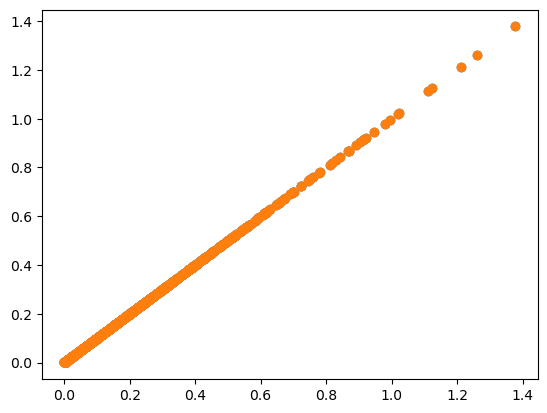

In [10]:
#for training
y_pred = best_RFR.predict(x_train)
plt.scatter(y_train, y_train)
plt.scatter(y_pred, y_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mse = mean_squared_error(y_train, y_pred)
corr, _ = pearsonr(y_train, y_pred)
mape=MAPE(y_train, y_pred)
rmse
R2=r2_score(y_train, y_pred)
print(R2,rmse,mse)

#determine ratio
ratio=y_train/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_RF.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Train: {}\n".format(R2))
f.write("RMSE Train: {}\n".format(rmse))
f.write("MSE Train: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Train: {}\n".format(corr))
f.write("MAPE Train: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_train_RF.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9843278986505348 0.022630908443133667 0.0005121580169614987
0.9916138296504876
0.13061130856300127
Writing Summary: DONE


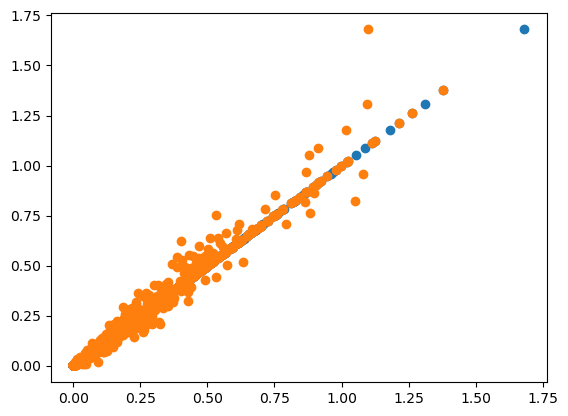

In [11]:
# for whole dataset
y_pred = best_RFR.predict(X)

plt.scatter(y, y)
plt.scatter(y_pred, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
mape=MAPE(y, y_pred)
rmse
corr, _ = pearsonr(y, y_pred)
R2=r2_score(y, y_pred)
print(R2,rmse,mse)

ratio=y/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_RF.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Total: {}\n".format(R2))
f.write("RMSE Total: {}\n".format(rmse))
f.write("MSE Total: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Total: {}\n".format(corr))
f.write("MAPE Total: {}\n".format(corr))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_total_RF.txt"), y_pred, delimiter=' ', fmt='%.6f')

<Axes: >

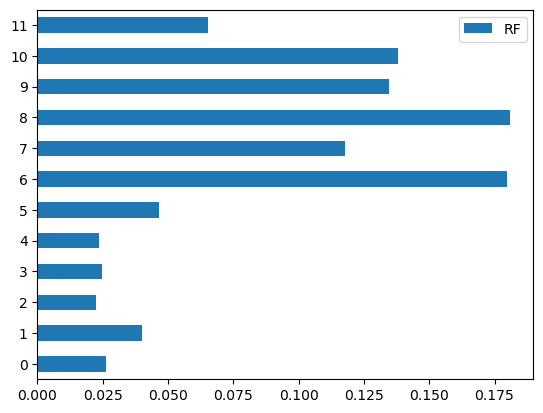

In [12]:
import pandas as pd
importances = pd.DataFrame()
importances["RF"] = pd.Series(best_RFR.feature_importances_)
importances.plot(kind="barh")

In [13]:
feature=best_RFR.feature_importances_
np.savetxt((f"{path}""feature_RF.txt"), feature, delimiter=' ', fmt='%.6f')

# XGBOOST

import numpy as np
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,30)}
#    'subsample': (1.0, 1.0),  # Change for big datasets
#    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
#    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth):
#                        subsample,
#                        colsample,
#                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBRegressor(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators)
#        gamma=gamma)
    return np.mean(cross_val_score(clf, x_train, y_train, cv=5, scoring='r2'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)
optimizer.maximize(init_points=30, n_iter=4)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.6}
Best XGBoost Mean CV MSE: -0.9713
Grid search results saved to 'XGB_GridSearch_CV_Results.csv'
XGBoost CV R² scores: [0.96639267 0.97677289 0.96396804 0.96843014 0.98078677]
XGBoost Mean R²: 0.9713
XGBoost Std deviation: 0.0064
Cross-validation scores saved to 'Best_XGB_CV_Scores.csv'
Test R²: 0.9708
Test RMSE: 0.0320
Test MSE: 0.0010
Test MAPE: 0.31%
Pearson Correlation: 0.9864


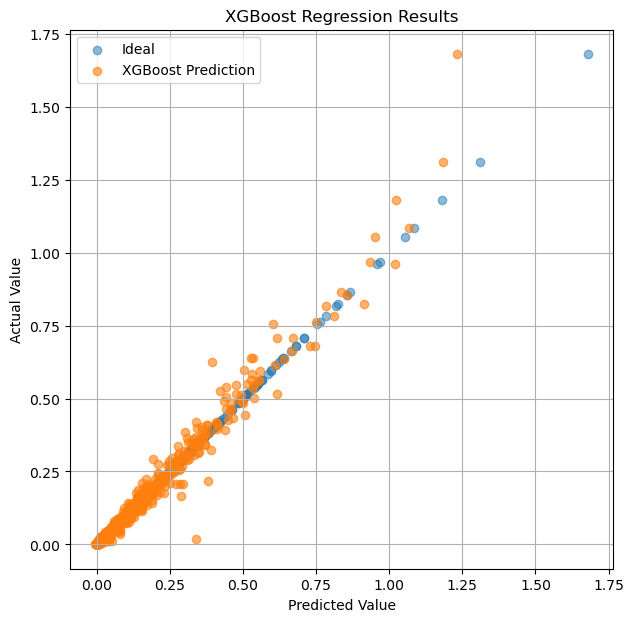

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import xgboost as xgb

# Step 0: K-Fold setup
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 1: Define XGBoost hyperparameter grid
param_grid_XGB = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Step 2: GridSearchCV setup for XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
#xgb_model = xgb.XGBRegressor()
grid_search_XGB = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_XGB,
    #scoring='neg_mean_squared_error',
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit GridSearch
grid_search_XGB.fit(x_train, y_train)

# Step 4: Extract best model and results
best_XGB = grid_search_XGB.best_estimator_
print(f"Best XGBoost Hyperparameters: {grid_search_XGB.best_params_}")
print(f"Best XGBoost Mean CV MSE: {-grid_search_XGB.best_score_:.4f}")

# Save GridSearch results
pd.DataFrame(grid_search_XGB.cv_results_).to_csv(f"{path}XGB_GridSearch_CV_Results.csv", index=False)
print("Grid search results saved to 'XGB_GridSearch_CV_Results.csv'")

# Step 5: Cross-validation of best model (R²)
cv_scores_XGB = cross_val_score(best_XGB, x_train, y_train, cv=kf, scoring='r2')
print(f'XGBoost CV R² scores: {cv_scores_XGB}')
print(f'XGBoost Mean R²: {np.mean(cv_scores_XGB):.4f}')
print(f'XGBoost Std deviation: {np.std(cv_scores_XGB):.4f}')

pd.DataFrame({'Fold': range(1, 6), 'R²': cv_scores_XGB}).to_csv(f"{path}Best_XGB_CV_Scores.csv", index=False)
print("Cross-validation scores saved to 'Best_XGB_CV_Scores.csv'")

# Step 6: Predict and Evaluate on Test Set
y_pred = best_XGB.predict(x_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Pearson Correlation: {corr:.4f}")

# Step 7: Plotting
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test, label='Ideal', alpha=0.5)
plt.scatter(y_pred, y_test, label='XGBoost Prediction', alpha=0.6)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('XGBoost Regression Results')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#y_pred = best_XGB.predict(x_test)
ratio=y_test/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))


f = open(f"{path}""00_SUMMARY_XGB.txt","w+")
f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
f.write("\n")   
f.write("\n")
f.write("R2 Test: {}\n".format(r2))
f.write("RMSE Test: {}\n".format(rmse))
f.write("MSE Test: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Test: {}\n".format(corr))
f.write("MAPE Test: {}\n".format(mape))
f.close()

print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_test_XGB.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9040063306457349
1.9692175312893634
Writing Summary: DONE


0.9988168829240385 0.006118498567027758 3.743602471472073e-05


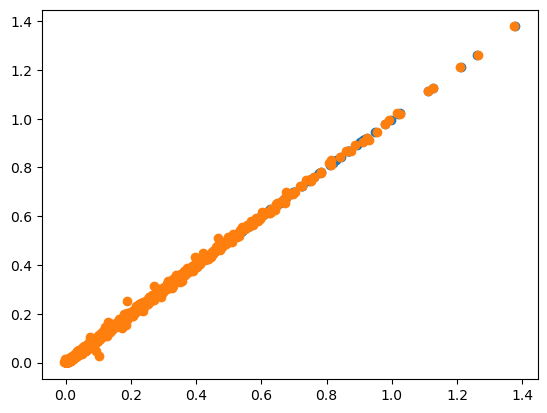

In [16]:
y_pred = best_XGB.predict(x_train)
np.savetxt((f"{path}""y_pred_train_XGB.txt"), y_pred, delimiter=' ', fmt='%.6f')
plt.scatter(y_train, y_train)
plt.scatter(y_pred, y_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mse = mean_squared_error(y_train, y_pred)
R2=r2_score(y_train, y_pred)
corr, _ = pearsonr(y_train, y_pred)
mape=MAPE(y_train, y_pred)
print(R2,rmse,mse)

In [17]:
ratio=y_train/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_XGB.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Train: {}\n".format(R2))
f.write("RMSE Train: {}\n".format(rmse))
f.write("MSE Train: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Train: {}\n".format(corr))
f.write("MAPE Train: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")

0.9935021286931587
4.441381890275283
Writing Summary: DONE


<Axes: >

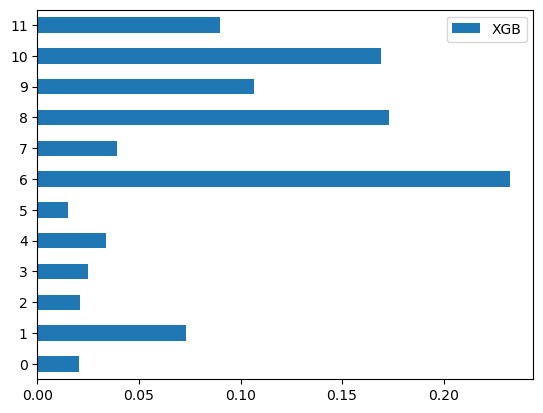

In [18]:
import pandas as pd
importances = pd.DataFrame()
importances["XGB"] = pd.Series(best_XGB.feature_importances_)
importances.plot(kind="barh")

In [19]:
feature=best_XGB.feature_importances_
np.savetxt((f"{path}""feature_XGB.txt"), feature, delimiter=' ', fmt='%.6f')

0.9898059017493189 0.01825209747139394 0.0003331390621052651


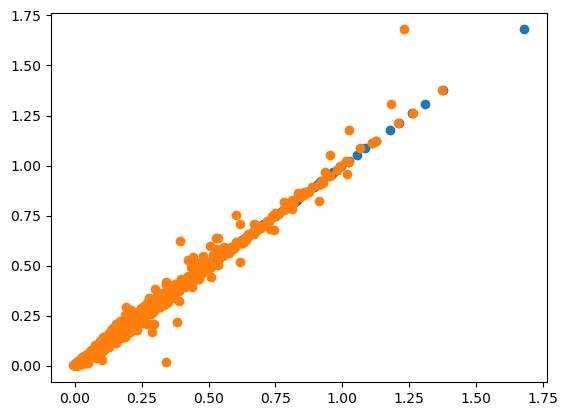

In [20]:
y_pred = best_XGB.predict(X)
np.savetxt((f"{path}""y_pred_total_XGB.txt"), y_pred, delimiter=' ', fmt='%.6f')
plt.scatter(y, y)
plt.scatter(y_pred, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
R2=r2_score(y, y_pred)
corr, _ = pearsonr(y, y_pred)
mape=MAPE(y, y_pred)
print(R2,rmse,mse)

In [21]:
ratio=y/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_XGB.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Total: {}\n".format(R2))
f.write("RMSE Total: {}\n".format(rmse))
f.write("MSE Total: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Total: {}\n".format(corr))
f.write("MAPE Total: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")

0.9666533892789316
3.869513983292888
Writing Summary: DONE


In [22]:
# write input
np.savetxt((f"{path}""x_test.txt"), x_test, delimiter=' ', fmt='%.6f')
np.savetxt((f"{path}""y_test.txt"), y_test, delimiter=' ', fmt='%.6f')
np.savetxt((f"{path}""x_train.txt"), x_train, delimiter=' ', fmt='%.6f')
np.savetxt((f"{path}""y_train.txt"), y_train, delimiter=' ', fmt='%.6f')

In [23]:
# model
from pickle import dump
from pickle import load
#filename = 'BestModel1.sav'
a=(f"{path}""BestModel_XGB.sav")
dump(best_XGB, open(a, 'wb'))


# GBRT

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best GBRT Hyperparameters: {'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}
Best GBRT Mean CV MSE: -0.9711
Grid search results saved to 'GBRT_GridSearch_CV_Results.csv'
GBRT Cross-validation R² scores: [0.96530771 0.97700532 0.96210394 0.97132435 0.97992607]
GBRT Mean R²: 0.9711
GBRT Std deviation: 0.0067
Cross-validation scores saved to 'Best_GBRT_CV_Scores.csv'
Test R²: 0.9729
Test RMSE: 0.0309
Test MSE: 0.0010
Test MAPE: 0.25%
Pearson Correlation: 0.9875


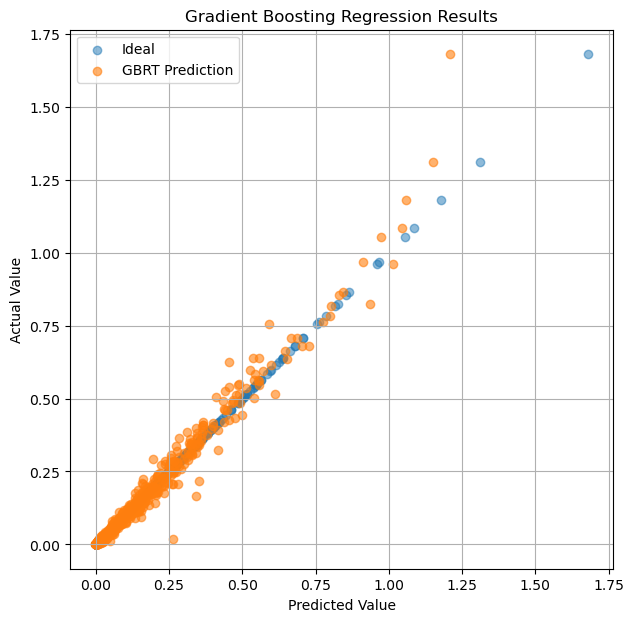

In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


# Step 0: Set up 5-fold cross-validation
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 1: Define hyperparameter grid for GradientBoostingRegressor
param_grid_GBRT = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Step 2: GridSearchCV setup
gbrt_model = GradientBoostingRegressor(random_state=42)
#gbrt_model = GradientBoostingRegressor()
grid_search_GBRT = GridSearchCV(
    estimator=gbrt_model,
    param_grid=param_grid_GBRT,
    #scoring='neg_mean_squared_error',
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit GridSearchCV
grid_search_GBRT.fit(x_train, y_train)

# Step 4: Extract best estimator and save results
best_GBRT = grid_search_GBRT.best_estimator_
print(f"Best GBRT Hyperparameters: {grid_search_GBRT.best_params_}")
print(f"Best GBRT Mean CV MSE: {-grid_search_GBRT.best_score_:.4f}")

pd.DataFrame(grid_search_GBRT.cv_results_).to_csv(f"{path}GBRT_GridSearch_CV_Results.csv", index=False)
print("Grid search results saved to 'GBRT_GridSearch_CV_Results.csv'")

# Step 5: Cross-validation with best model
cv_scores_GBRT = cross_val_score(best_GBRT, x_train, y_train, cv=kf, scoring='r2')
print(f"GBRT Cross-validation R² scores: {cv_scores_GBRT}")
print(f"GBRT Mean R²: {np.mean(cv_scores_GBRT):.4f}")
print(f"GBRT Std deviation: {np.std(cv_scores_GBRT):.4f}")

pd.DataFrame({'Fold': range(1, 6), 'R²': cv_scores_GBRT}).to_csv(f"{path}Best_GBRT_CV_Scores.csv", index=False)
print("Cross-validation scores saved to 'Best_GBRT_CV_Scores.csv'")

# Step 6: Predict and evaluate on test set
y_pred = best_GBRT.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Pearson Correlation: {corr:.4f}")

# Step 7: Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test, label='Ideal', alpha=0.5)
plt.scatter(y_pred, y_test, label='GBRT Prediction', alpha=0.6)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Gradient Boosting Regression Results')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
#for testing
y_pred = best_GBRT.predict(x_test)
ratio=y_test/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))


f = open(f"{path}""00_SUMMARY_GBRT.txt","w+")
f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
f.write("\n")   
f.write("\n")
f.write("R2 Test: {}\n".format(r2))
f.write("RMSE Test: {}\n".format(rmse))
f.write("MSE Test: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Test: {}\n".format(corr))
f.write("MAPE Test: {}\n".format(mape))
f.close()

print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_test_GBRT.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9754066784759877
0.4663179914968605
Writing Summary: DONE


0.9990637770789524 0.005442778193611573 2.9623834464853656e-05
1.0321962183572364
3.624862813733117
Writing Summary: DONE


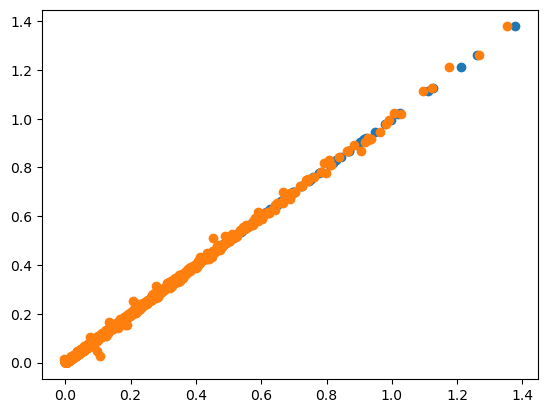

In [26]:
#for training
y_pred = best_GBRT.predict(x_train)
plt.scatter(y_train, y_train)
plt.scatter(y_pred, y_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mse = mean_squared_error(y_train, y_pred)
corr, _ = pearsonr(y_train, y_pred)
mape=MAPE(y_train, y_pred)
rmse
R2=r2_score(y_train, y_pred)
print(R2,rmse,mse)

#determine ratio
ratio=y_train/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_GBRT.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Train: {}\n".format(R2))
f.write("RMSE Train: {}\n".format(rmse))
f.write("MSE Train: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Train: {}\n".format(corr))
f.write("MAPE Train: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_train_GBRT.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9906193002500695 0.017508784188201534 0.000306557523749016
1.0151593563928618
3.0436251895583495
Writing Summary: DONE


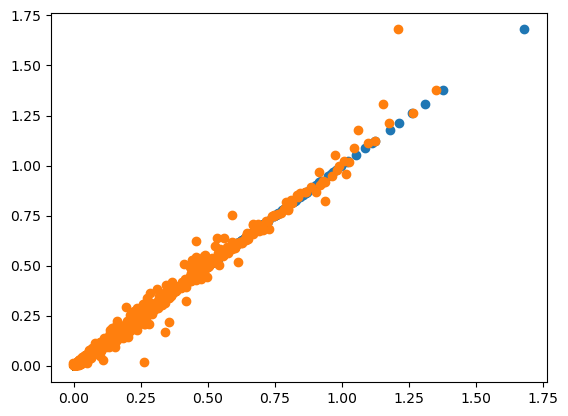

In [27]:
# for whole dataset
y_pred = best_GBRT.predict(X)

plt.scatter(y, y)
plt.scatter(y_pred, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
corr, _ = pearsonr(y, y_pred)
mape=MAPE(y, y_pred)
R2=r2_score(y, y_pred)
print(R2,rmse,mse)

ratio=y/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_GBRT.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Total: {}\n".format(R2))
f.write("RMSE Total: {}\n".format(rmse))
f.write("MSE Total: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Total: {}\n".format(corr))
f.write("MAPE Total: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_total_GBRT.txt"), y_pred, delimiter=' ', fmt='%.6f')

<Axes: >

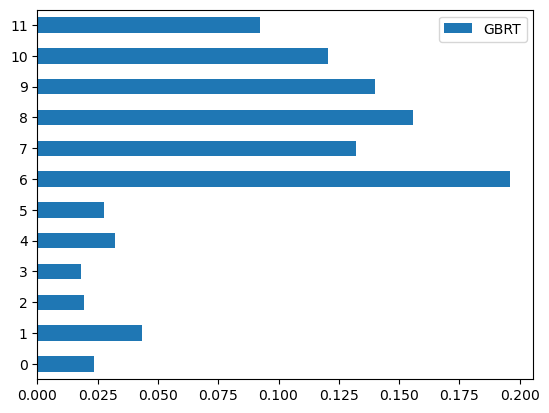

In [28]:
import pandas as pd
importances = pd.DataFrame()
importances["GBRT"] = pd.Series(best_GBRT.feature_importances_)
importances.plot(kind="barh")

In [29]:
from pickle import dump
from pickle import load
a=(f"{path}""BestModel_GBRT.sav")
dump(best_GBRT, open(a, 'wb'))

In [30]:
feature=best_GBRT.feature_importances_
np.savetxt((f"{path}""feature_GBRT.txt"), feature, delimiter=' ', fmt='%.6f')

# ADABOOST

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best AdaBoost Hyperparameters: {'base_estimator': DecisionTreeRegressor(max_depth=10), 'learning_rate': 0.1, 'n_estimators': 100}
Best AdaBoost Mean CV MSE: -0.9435
Grid search results saved to 'AdaBoost_GridSearch_CV_Results.csv'
AdaBoost Cross-validation R² scores: [0.93404115 0.96068672 0.92038856 0.94918381 0.95327095]
AdaBoost Mean R²: 0.9435
AdaBoost Std deviation: 0.0145
Cross-validation scores saved to 'Best_AdaBoost_CV_Scores.csv'
Test R²: 0.9451
Test RMSE: 0.0439
Test MSE: 0.0019
Test MAPE: 0.31%
Pearson Correlation: 0.9731


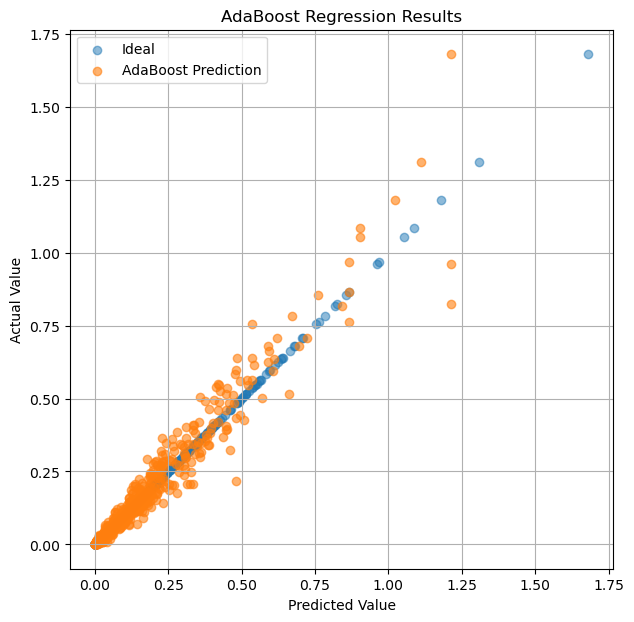

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Step 0: Define K-Fold Cross-validator
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 1: Hyperparameter grid for AdaBoostRegressor
param_grid_ADA = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'base_estimator': [
        DecisionTreeRegressor(max_depth=3),
        DecisionTreeRegressor(max_depth=5),
        DecisionTreeRegressor(max_depth=10),
        DecisionTreeRegressor(max_depth=15)
    ]
}

# Step 2: Set up GridSearchCV
adaboost_model = AdaBoostRegressor(random_state=42)
#adaboost_model = AdaBoostRegressor()
grid_search_ADA = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid_ADA,
    #scoring='neg_mean_squared_error',
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit GridSearch
grid_search_ADA.fit(x_train, y_train)

# Step 4: Retrieve best model and save grid results
best_ADA = grid_search_ADA.best_estimator_
print(f"Best AdaBoost Hyperparameters: {grid_search_ADA.best_params_}")
print(f"Best AdaBoost Mean CV MSE: {-grid_search_ADA.best_score_:.4f}")

pd.DataFrame(grid_search_ADA.cv_results_).to_csv(f"{path}AdaBoost_GridSearch_CV_Results.csv", index=False)
print("Grid search results saved to 'AdaBoost_GridSearch_CV_Results.csv'")

# Step 5: Evaluate with cross-validation (R²)
cv_scores_ADA = cross_val_score(best_ADA, x_train, y_train, cv=kf, scoring='r2')
print(f"AdaBoost Cross-validation R² scores: {cv_scores_ADA}")
print(f"AdaBoost Mean R²: {np.mean(cv_scores_ADA):.4f}")
print(f"AdaBoost Std deviation: {np.std(cv_scores_ADA):.4f}")

pd.DataFrame({'Fold': range(1, 6), 'R²': cv_scores_ADA}).to_csv(f"{path}Best_AdaBoost_CV_Scores.csv", index=False)
print("Cross-validation scores saved to 'Best_AdaBoost_CV_Scores.csv'")

# Step 6: Predict and evaluate on test set
y_pred = best_ADA.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
corr, _ = pearsonr(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Pearson Correlation: {corr:.4f}")

# Step 7: Plot actual vs predicted
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test, label='Ideal', alpha=0.5)
plt.scatter(y_pred, y_test, label='AdaBoost Prediction', alpha=0.6)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('AdaBoost Regression Results')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
print(y_test.shape)
print(y_pred.shape)

(756,)
(756,)


In [33]:
#for testing
y_pred = best_ADA.predict(x_test)
ratio=y_test/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))


f = open(f"{path}""00_SUMMARY_AdaBoost.txt","w+")
f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
f.write("\n")   
f.write("\n")
f.write("R2 Test: {}\n".format(r2))
f.write("RMSE Test: {}\n".format(rmse))
f.write("MSE Test: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Test: {}\n".format(corr))
f.write("MAPE Test: {}\n".format(mape))
f.close()

print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_test_AdaBoost.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9631498920935195
0.2936107574326341
Writing Summary: DONE


0.9980293249797773 0.007896570319962722 6.235582281811615e-05
0.9671564825244507
0.18970630318691797
Writing Summary: DONE


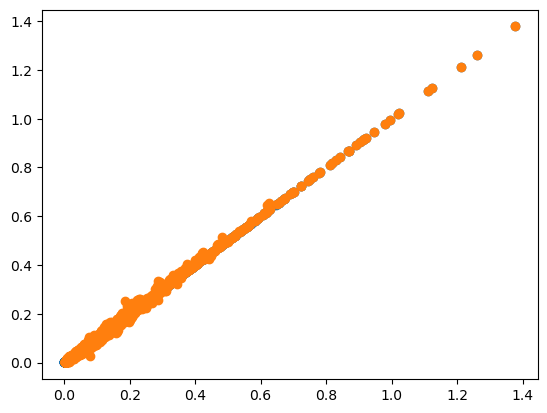

In [34]:
#for training
y_pred = best_ADA.predict(x_train)
plt.scatter(y_train, y_train)
plt.scatter(y_pred, y_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mse = mean_squared_error(y_train, y_pred)
corr, _ = pearsonr(y_train, y_pred)
mape=MAPE(y_train, y_pred)
rmse
R2=r2_score(y_train, y_pred)
print(R2,rmse,mse)

#determine ratio
ratio=y_train/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_AdaBoost.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Train: {}\n".format(R2))
f.write("RMSE Train: {}\n".format(rmse))
f.write("MSE Train: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Train: {}\n".format(corr))
f.write("MAPE Train: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_train_AdaBoost.txt"), y_pred, delimiter=' ', fmt='%.6f')

0.9809653772635271 0.024940807401126436 0.0006220438738200832
0.9659545053951715
0.22595904755793111
Writing Summary: DONE


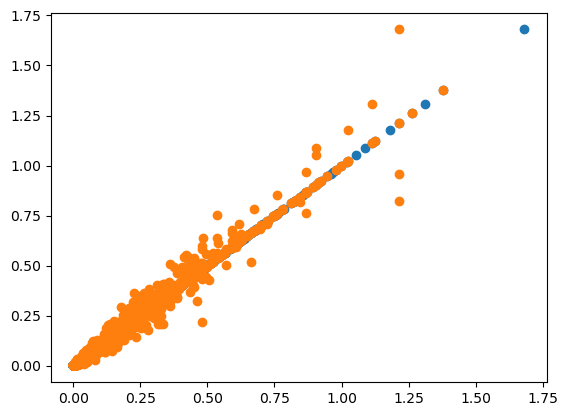

In [35]:
# for whole dataset
y_pred = best_ADA.predict(X)

plt.scatter(y, y)
plt.scatter(y_pred, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
corr, _ = pearsonr(y, y_pred)
mape=MAPE(y, y_pred)
R2=r2_score(y, y_pred)
print(R2,rmse,mse)

ratio=y/y_pred
me=np.mean(ratio)
st=np.std(ratio)

print(np.mean(ratio))
print(np.std(ratio))
f = open(f"{path}""00_SUMMARY_AdaBoost.txt","a")
#f.write("Model summary\n")
#for i in range(len(stringlist)):
#    f.writelines(f"{stringlist[i]}\n")
 
f.write("\n")
f.write("R2 Total: {}\n".format(R2))
f.write("RMSE Total: {}\n".format(rmse))
f.write("MSE Total: {}\n".format(mse))
f.write("Mean ratio: {}\n".format(me))
f.write("Std ratio: {}\n".format(st))
f.write("r Total: {}\n".format(corr))
f.write("MAPE Total: {}\n".format(mape))
f.close() 
print("Writing Summary: DONE")
np.savetxt((f"{path}""y_pred_total_AdaBoost.txt"), y_pred, delimiter=' ', fmt='%.6f')

<Axes: >

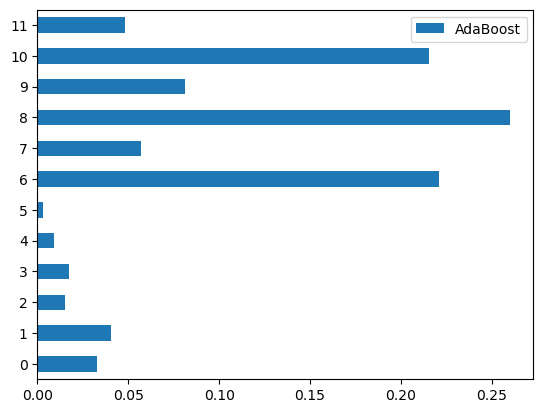

In [36]:
import pandas as pd
importances = pd.DataFrame()
importances["AdaBoost"] = pd.Series(best_ADA.feature_importances_)
importances.plot(kind="barh")

In [37]:
from pickle import dump
from pickle import load
a=(f"{path}""BestModel_AdaBoost.sav")
dump(best_ADA, open(a, 'wb'))

In [38]:
feature=best_ADA.feature_importances_
np.savetxt((f"{path}""feature_AdaBoost.txt"), feature, delimiter=' ', fmt='%.6f')